In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics


import string
from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import os
for dirname, _, filenames in os.walk('/Users/rajashree/Downloads/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/rajashree/Downloads/106266.jpg
/Users/rajashree/Downloads/12+Rules+to+Learn+to+Code+[2nd+Edition]+2022.pdf
/Users/rajashree/Downloads/12dfd494-e234-41d0-90ac-d59a37926b78.png
/Users/rajashree/Downloads/2.1+Heading+Element
/Users/rajashree/Downloads/2.1+Heading+Element.zip
/Users/rajashree/Downloads/2023+Web+Dev+Syllabus.pdf
/Users/rajashree/Downloads/61d74e47-93ff-40b1-aa59-2b8bf54fcc26.png
/Users/rajashree/Downloads/a4c911b9-8d77-4b0f-ab60-8ae528edaefb.png
/Users/rajashree/Downloads/android-studio-2022.3.1.20-windows (1).exe
/Users/rajashree/Downloads/AppBreweryCornellNotesTemplate (1).pdf
/Users/rajashree/Downloads/AppBreweryCornellNotesTemplate (2).pdf
/Users/rajashree/Downloads/AppBreweryCornellNotesTemplate.pdf
/Users/rajashree/Downloads/archive (1).zip
/Users/rajashree/Downloads/archive (2).zip
/Users/rajashree/Downloads/archive.zip
/Users/rajashree/Downloads/Assignment_1_NPTEL_DBMS_January_2024.pdf
/Users/rajashree/Downloads/aston-martin-7680x4320-13088.jpg
/Users/rajashr

In [7]:
df=pd.read_csv(r'\Users\rajashree\Downloads\spam.csv', encoding='latin-1')

In [8]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

In [9]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns

Index(['label', 'message'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

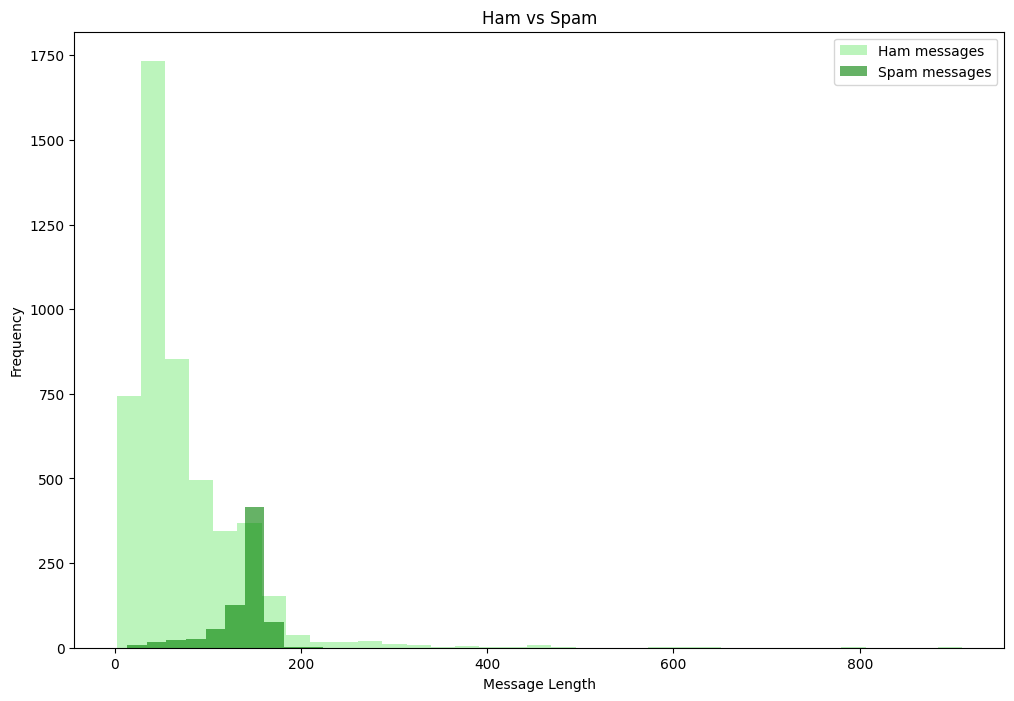

In [20]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='lightgreen', 
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='green', 
                                       label='Spam messages', alpha=0.6)
plt.title("Ham vs Spam")
plt.legend()
plt.xlabel("Message Length")

In [21]:
df[df.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [22]:
df[df.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [23]:
df[df.message_len == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [40]:
df.isna().sum()

label          0
message        0
label_num      0
message_len    0
dtype: int64

In [42]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

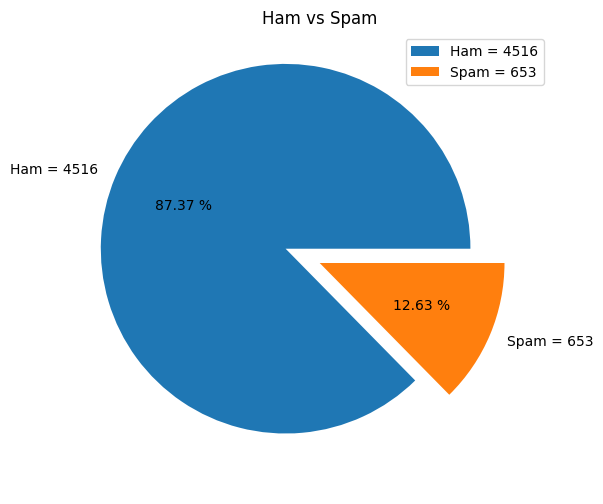

In [49]:
number_of_spam = df[df['label'] == 'spam'].shape[0]
number_of_ham = df[df['label'] == 'ham'].shape[0]

plt.figure(figsize=(7,6))

mail_categories = [number_of_ham, number_of_spam]
labels = [f"Ham = {number_of_ham}", f"Spam = {number_of_spam}"]
explode = [.2, 0]

plt.pie(mail_categories, labels=labels, explode=explode, autopct="%.2f %%")
plt.title("Ham vs Spam")
plt.legend()

plt.show()

In [52]:
df.drop('label', inplace =True, axis =1)

In [57]:
x = df['message']
y = df['message_len']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [58]:
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)

In [76]:
classifier = MultinomialNB()
classifier.fit(x_train_counts, y_train)

MultinomialNB()

In [60]:
x_test_counts = vectorizer.transform(x_test)
y_pred = classifier.predict(x_test_counts)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00        19
          23       0.00      0.00      0.00        18
          24       0.00      0.00      0.00        26
          25       0.14    

C:\Users\rajashree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajashree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajashree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average